# Vectors – Linear Algebra Foundations

---

## What is this?

This notebook introduces **vectors**, the building blocks of linear algebra.

---

## Core idea

- Vectors have both magnitude and direction.
- They can be added, scaled, and combined to form new vectors.
- Inner (dot) and cross products describe angles, projection, and perpendicularity.
- The span and linear independence of vectors form the foundation for vector spaces.

---

## What we’ll do

1. Define and visualize vectors in 2D and 3D  
2. Compute vector addition and scalar multiplication  
3. Compute dot and cross products and interpret them  
4. Visualize vector combinations and span  
5. Confirm orthogonality and basic basis ideas

---

## Goal

> Build intuition about vectors algebraically and geometrically using Python.


In [12]:
import numpy as np

import matplotlib.pyplot as plt

In [13]:
A = np.array([[2, 1],
              [1, 2]])

v1 = np.array([2, 1])
v2 = np.array([1, 2])

In [14]:
v1_transformed = A @ v1
v2_transformed = A @ v2

print("A * v1 =", v1_transformed)
print("A * v2 =", v2_transformed)

A * v1 = [5 4]
A * v2 = [4 5]


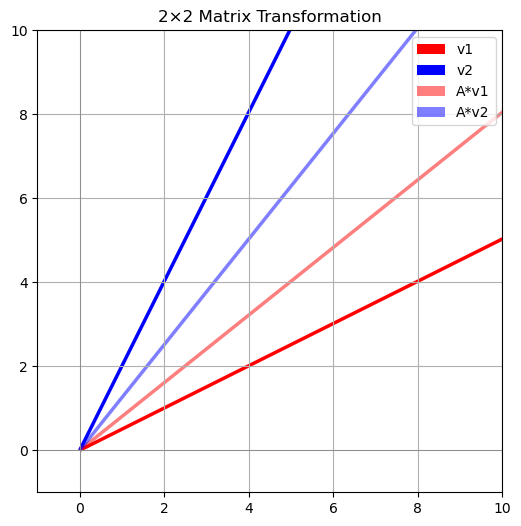

In [17]:
origin = np.zeros(2)

plt.figure(figsize=(6, 6))

plt.quiver(*origin, *v1, color='r', scale=1, label='v1')
plt.quiver(*origin, *v2, color='b', scale=1, label='v2')

plt.quiver(*origin, *v1_transformed, color='r', alpha=0.5, scale=1, label='A*v1')
plt.quiver(*origin, *v2_transformed, color='b', alpha=0.5, scale=1, label='A*v2')

plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.legend()
plt.title('2×2 Matrix Transformation')
plt.grid(True)
plt.show()

## Interpretation

When we apply a 2×2 matrix **A** to vectors in 2D space, we’re performing a **linear transformation**.

- The original vectors `v1` and `v2` represent a basis (or a region they span) before transformation.
- The transformed vectors `A*v1` and `A*v2` show how that same region changes under the linear map.
- The **directions** of the vectors may change, showing rotation or shearing.
- The **lengths** may change, showing stretching or compression.
- The **angle** between them may change, revealing distortion of the basis.

The determinant of **A** tells us about the change in **area**:
- If `det(A)` > 0, orientation is preserved.
- If `det(A)` < 0, orientation is flipped (the parallelogram is mirrored).
- The absolute value of `det(A)` gives the factor by which the area of the unit square (or the parallelogram spanned by the original vectors) is scaled.

> Visualizing the original and transformed vectors together makes the action of the matrix clear: you see exactly how a simple grid or any vector combination would be mapped in the plane.


# 2×2 Matrices – Determinant and Area Scaling

---

## What is this?

This notebook shows how a **2×2 matrix** acts as a linear transformation  
and how its **determinant** measures the scaling of area in 2D space.

---

## Core idea

- Any 2×2 matrix `A` maps vectors in 2D to new vectors.
- The **determinant** of `A` tells you how the area of shapes changes:
  - `|det(A)|` is the scale factor for area.
  - `det(A)` < 0 means the transformation flips orientation.
- A pair of vectors `[v1 v2]` span a parallelogram whose area is `|det([v1 v2])|`.
- After applying `A`, the new parallelogram’s area is `|det(A)|` times the original.

---

## What we’ll do

1. Define a 2×2 matrix and basis vectors  
2. Visualize the original and transformed vectors  
3. Compute and compare determinants: original span, transformation, and transformed span  
4. Interpret how the determinant connects algebra to geometry

---

## Goal

> Understand how determinants show up naturally  
> as the signed scale factor for area in linear maps.


In [18]:
B = np.column_stack((v1, v2))
det_B = np.linalg.det(B)

In [20]:
B_transformed = A @ B
det_B_transformed = np.linalg.det(B_transformed)
det_A = np.linalg.det(A)

print("det(B):", det_B)
print("det(A):", det_A)
print("det(B_transformed):", det_B_transformed)
print("det(B_transformed) ?= det(A) * det(B):", det_B_transformed, "vs", det_A * det_B)

det(B): 2.9999999999999996
det(A): 2.9999999999999996
det(B_transformed): 8.999999999999998
det(B_transformed) ?= det(A) * det(B): 8.999999999999998 vs 8.999999999999998


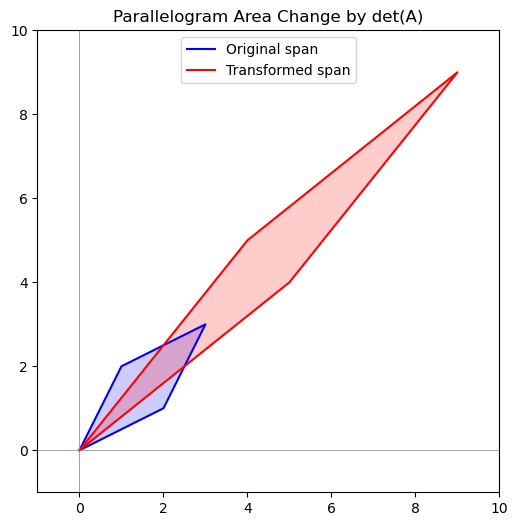

In [21]:
fig, ax = plt.subplots(figsize=(6,6))

parallelogram = np.array([
    [0, 0],
    v1,
    v1 + v2,
    v2,
    [0, 0]
])
ax.plot(parallelogram[:,0], parallelogram[:,1], 'b-', label='Original span')
ax.fill(parallelogram[:,0], parallelogram[:,1], 'b', alpha=0.2)

v1_t = B_transformed[:,0]
v2_t = B_transformed[:,1]

parallelogram_t = np.array([
    [0, 0],
    v1_t,
    v1_t + v2_t,
    v2_t,
    [0, 0]
])
ax.plot(parallelogram_t[:,0], parallelogram_t[:,1], 'r-', label='Transformed span')
ax.fill(parallelogram_t[:,0], parallelogram_t[:,1], 'r', alpha=0.2)


ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_aspect('equal')
ax.set_xlim(-1, max(v1_t[0]+v2_t[0], v1[0]+v2[0]) + 1)
ax.set_ylim(-1, max(v1_t[1]+v2_t[1], v1[1]+v2[1]) + 1)
ax.legend()
ax.set_title('Parallelogram Area Change by det(A)')

plt.show()

## Interpretation

- The blue parallelogram shows the original area spanned by `[v1 v2]`.
- The red parallelogram shows the same vectors after the linear transformation `A` is applied.
- The determinant of `A` acts as a **scale factor** for area.
- The ratio `|det(B_transformed)| / |det(B)|` equals `|det(A)|`.
- This means any shape you build with `[v1 v2]` will have its area scaled by `|det(A)|` when you apply `A`.

> Visually, the determinant connects algebra and geometry:  
> it measures how a matrix stretches, compresses, or flips shapes in space.
